In [2]:
# Import all required packages

import gym
import numpy as np
from matplotlib import pyplot as plt
import argparse
import multiprocessing as mp
import warnings
import puddle_world
from tqdm import tqdm
warnings.simplefilter('ignore')
from algo import QLearning
from algo import SARSA
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

In [3]:
# Creating an instance of the class Qlearning .....

ql = QLearning()

In [4]:
# Initialzing parameters .....

gamma = 0.9
alpha = 0.1
epsilon = 0.1
num_episodes = 1000

# Change this to A or B to run a different variant of the problem
goal = 'C'

In [5]:
# Averaging over different instances ....

def average():
    rewards, num_steps, Q = ql.episode_run(gamma, alpha, epsilon, num_episodes, gym.make('PuddleWorld-v0'),goal)
    for i in tqdm(range(2,51)):
        rewards_, num_steps_, Q_ = ql.episode_run(gamma, alpha, epsilon, num_episodes, gym.make('PuddleWorld-v0'),goal)
        for j in range(len(rewards)):
            rewards[j] = rewards[j] + (rewards_[j] - rewards[j])/i
            num_steps[j] = num_steps[j] + (num_steps_[j] - num_steps_[j])/i
        for l in range(len(Q)):
            for m in range(len(Q[l])):
                for n in range(len(Q[l,m])):
                    Q[l,m,n] = Q[l,m,n] + (Q_[l,m,n] - Q[l,m,n])/i
            
    return rewards, num_steps, Q

In [6]:
rewards, num_steps, Q = average()

100%|██████████| 49/49 [01:26<00:00,  1.77s/it]


Text(0,0.5,'Average no. of steps')

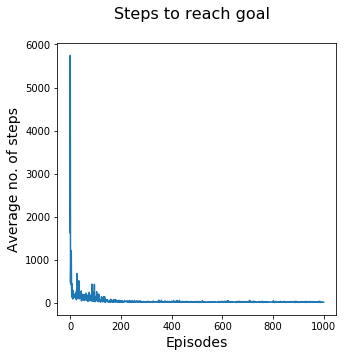

In [46]:
# Plotting reward evolution and number of steps taken ....


fig = plt.figure()
fig.suptitle('Steps to reach goal', fontsize = 16)
plt.plot(num_steps)
plt.xlabel('Episodes', fontsize = 14)
plt.ylabel('Average no. of steps', fontsize = 14)

In [7]:
# Displaying the optimal policy ....

policy = np.zeros([12,12])
policy = np.argmax(Q, axis = 2)

In [8]:
policy

array([[2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2],
       [2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1],
       [2, 1, 1, 0, 3, 0, 0, 0, 0, 2, 2, 1],
       [2, 3, 1, 3, 3, 3, 3, 0, 0, 2, 2, 2],
       [2, 1, 1, 1, 3, 3, 0, 0, 2, 2, 2, 1],
       [2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1],
       [2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1],
       [2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 3, 3, 1, 1, 1, 1],
       [0, 3, 0, 0, 3, 3, 3, 3, 3, 1, 3, 3],
       [0, 0, 0, 0, 3, 3, 3, 3, 3, 1, 1, 1]])

In [43]:
# Function to show policy

def show_policy(goal, policy):
    plt.rcParams['figure.figsize'] = [5,5]
    fig, ax = plt.subplots()
    ax.matshow(policy)
    for i in range(12):
        for j in range(12):
            if [i,j] == [7,6]:
                ax.text(i,j,'G', va ='center', ha ='center')
            else:
                l = int(policy[i,j])
                optimal_actions = {0:'↓', 1:'↑', 2:'➜', 3:'←' }
                ax.text(i, j, optimal_actions[l], va = 'center', ha ='center')

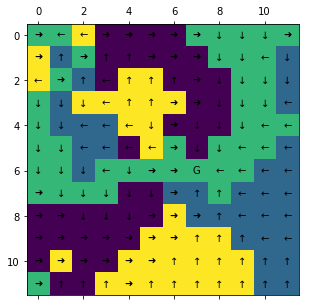

In [44]:
show_policy(goal, policy)

## SARSA

In [2]:
# Creating an instance of the class SARSA .....

sr = SARSA()

In [44]:
# Initialing parameters .....

gamma = 0.9
alpha = 0.1
lambd = 0
epsilon = 0.1
num_episodes = 25
goal = 'C'

In [22]:
# Averaging over multiple instances of the problem ....

def average_sarsa(lam):
    rewards, num_steps, Q = sr.episode_run(gamma, alpha, epsilon, lam, num_episodes, gym.make('PuddleWorld-v0'),goal)
    for i in tqdm(range(2,51)):
        rewards_, num_steps_, Q_ = sr.episode_run(gamma, alpha, epsilon, lam, num_episodes, gym.make('PuddleWorld-v0'),goal)
        for j in range(len(rewards)):
            rewards[j] = rewards[j] + (rewards_[j] - rewards[j])/i
            num_steps[j] = num_steps[j] + (num_steps_[j] - num_steps_[j])/i
        for l in range(len(Q)):
            for m in range(len(Q[l])):
                for n in range(len(Q[l,m])):
                    Q[l,m,n] = Q[l,m,n] + (Q_[l,m,n] - Q[l,m,n])/i
            
    return rewards, num_steps, Q

In [5]:
rewards, num_steps, Q = average_sarsa()

100%|██████████| 49/49 [03:40<00:00,  4.51s/it]


Text(0,0.5,'Average reward')

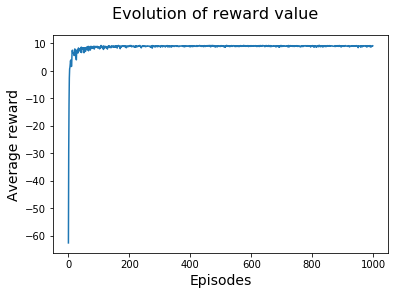

In [6]:
# Plotting reward evolution and number of steps taken .....

fig = plt.figure()
fig.suptitle('Evolution of reward value', fontsize = 16)
plt.plot(rewards)
plt.xlabel('Episodes', fontsize = 14)
plt.ylabel('Average reward', fontsize = 14)

Text(0,0.5,'Average no. of steps')

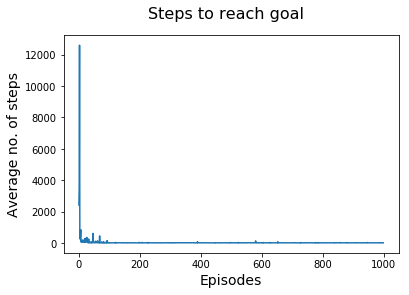

In [7]:
fig = plt.figure()
fig.suptitle('Steps to reach goal', fontsize = 16)
plt.plot(num_steps)
plt.xlabel('Episodes', fontsize = 14)
plt.ylabel('Average no. of steps', fontsize = 14)

In [8]:
# Displaying the optimal policy .....

policy = np.zeros([12,12])
policy = np.argmax(Q, axis = 2)

In [9]:
# Function to show optimal policy

def show_policy(goal, policy):
    plt.rcParams['figure.figsize'] = [5,5]
    fig, ax = plt.subplots()
    ax.matshow(policy)
    for i in range(12):
        for j in range(12):
            if [i,j] == [7,6]:
                ax.text(i,j,'G', va ='center', ha ='center')
            else:
                l = int(policy[i,j])
                optimal_actions = {0:'↓', 1:'↑', 2:'➜', 3:'←' }
                ax.text(i, j, optimal_actions[l], va = 'center', ha ='center')

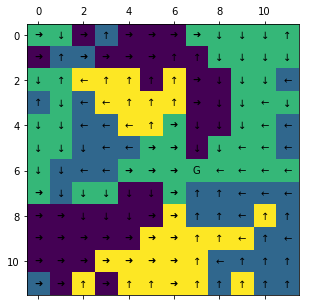

In [10]:
show_policy(goal,policy)

In [45]:
### SARSA-lambda ###

lam = [0,0.3,0.5,0.9,0.99,1]
rewards = []
num_steps = []
for i in tqdm(range(len(lam))):
    reward, num_step, Q = average_sarsa(lam[i])
    rewards.append(reward[24])
    num_steps.append(num_step[24])





  0%|          | 0/6 [00:00<?, ?it/s]




  0%|          | 0/49 [00:00<?, ?it/s]




  2%|▏         | 1/49 [00:01<01:07,  1.41s/it]




  4%|▍         | 2/49 [00:02<01:02,  1.32s/it]




  6%|▌         | 3/49 [00:03<01:02,  1.37s/it]




  8%|▊         | 4/49 [00:04<00:49,  1.10s/it]




 10%|█         | 5/49 [00:05<00:46,  1.06s/it]




 12%|█▏        | 6/49 [00:05<00:38,  1.12it/s]




 14%|█▍        | 7/49 [00:06<00:32,  1.29it/s]




 16%|█▋        | 8/49 [00:07<00:29,  1.39it/s]




 18%|█▊        | 9/49 [00:07<00:28,  1.38it/s]




 20%|██        | 10/49 [00:08<00:27,  1.44it/s]




 22%|██▏       | 11/49 [00:09<00:28,  1.35it/s]




 24%|██▍       | 12/49 [00:10<00:29,  1.27it/s]




 27%|██▋       | 13/49 [00:11<00:35,  1.01it/s]




 29%|██▊       | 14/49 [00:13<00:39,  1.14s/it]




 31%|███       | 15/49 [00:14<00:37,  1.11s/it]




 33%|███▎      | 16/49 [00:17<00:54,  1.65s/it]




 35%|███▍      | 17/49 [00:18<00:46,  1.47s/it]




 37%|███▋      | 18/49 [00:19<00:46,

 84%|████████▎ | 41/49 [00:33<00:06,  1.26it/s]




 86%|████████▌ | 42/49 [00:34<00:05,  1.24it/s]




 88%|████████▊ | 43/49 [00:35<00:04,  1.23it/s]




 90%|████████▉ | 44/49 [00:35<00:03,  1.27it/s]




 92%|█████████▏| 45/49 [00:36<00:03,  1.21it/s]




 94%|█████████▍| 46/49 [00:37<00:02,  1.18it/s]




 96%|█████████▌| 47/49 [00:38<00:01,  1.17it/s]




 98%|█████████▊| 48/49 [00:39<00:00,  1.21it/s]




100%|██████████| 49/49 [00:40<00:00,  1.21it/s]




 83%|████████▎ | 5/6 [03:33<00:43, 43.55s/it]




  0%|          | 0/49 [00:00<?, ?it/s]




  2%|▏         | 1/49 [00:00<00:33,  1.44it/s]




  4%|▍         | 2/49 [00:01<00:36,  1.29it/s]




  6%|▌         | 3/49 [00:02<00:37,  1.22it/s]




  8%|▊         | 4/49 [00:03<00:35,  1.25it/s]




 10%|█         | 5/49 [00:04<00:36,  1.20it/s]




 12%|█▏        | 6/49 [00:05<00:35,  1.20it/s]




 14%|█▍        | 7/49 [00:05<00:31,  1.32it/s]




 16%|█▋        | 8/49 [00:06<00:30,  1.33it/s]




 18%|█▊        | 9/49 [00:07<00

Text(0,0.5,'No. of steps')

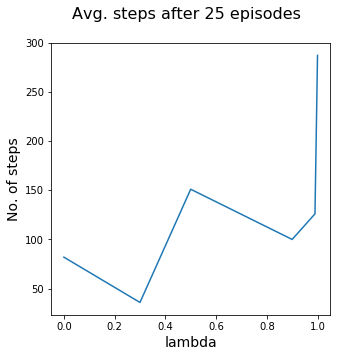

In [47]:
fig = plt.figure()
fig.suptitle('Avg. steps after 25 episodes', fontsize = 16)
plt.plot(lam, num_steps)
plt.xlabel('lambda', fontsize = 14)
plt.ylabel('No. of steps', fontsize = 14)